# Daily-Dose-of-Data-Science

[Daily Dose of Data Science](https://avichawla.substack.com) is a publication on Substack that brings together intriguing frameworks, libraries, technologies, and tips that make the life cycle of a Data Science project effortless. 

Author: Avi Chawla

[Medium](https://medium.com/@avi_chawla) | [LinkedIn](https://www.linkedin.com/in/avi-chawla/)

# How Many Dimensions Should You Reduce Your Data To When Using PCA?

Post Link: [Substack](https://avichawla.substack.com/p/how-many-dimensions-should-you-reduce)

LinkedIn Post: [LinkedIn](https://www.linkedin.com/feed/update/urn:li:share:7054019408293240832/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

from sklearn.decomposition import PCA
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('svg')
plt.style.use("seaborn-darkgrid")
sns.set()

In [2]:
def percent_formatter(x, pos):
    return f"{x*100:.0f}%"

## Dummy data

In [3]:
# Mean values for the 10 dimensions
init_dimensions = 10

mean = np.zeros(init_dimensions)

# Variances for the 10 dimensions
variances = np.array([10, 8, 6, 4, 2, 1, 0.5, 0.4, 0.3, 0.2])

# Covariance matrix
cov_matrix = np.diag(variances)

# Generate the 10-dimensional dataset (1000 samples)
data = np.random.multivariate_normal(mean, cov_matrix, size=1000)

## Apply PCA

In [4]:
pca = PCA()
pca.fit(data)

PCA()

In [5]:
exp_var = pca.explained_variance_ratio_ ## variance of individual component 

cumulative_explained_variance = np.cumsum(exp_var) ## cumulative variance

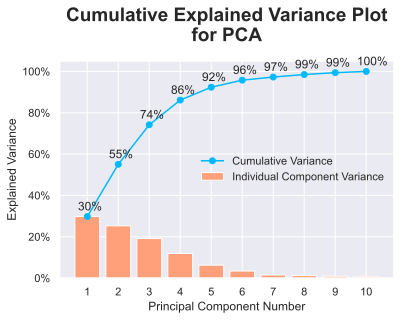

In [6]:
fig, ax = plt.subplots()

## add individual variance bars
plt.bar(range(1, init_dimensions+1), exp_var, align='center',
        label='Individual Component Variance', color = 'lightsalmon')

## add cumulative variance line
plt.plot(range(1, init_dimensions+1), cumulative_explained_variance, marker="o",
         label='Cumulative Variance', color='#00B9FF')

## add cumulative variance annotation
for x, y in zip(range(1, init_dimensions+1), cumulative_explained_variance):
    ax.annotate(f"{round(y * 100):.0f}%", (x - 0.3, y + 0.03))

## add label, title, ticks
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance')
plt.title('Cumulative Explained Variance Plot\nfor PCA', fontsize=19, fontweight="bold", pad=20)
plt.xticks(range(1, init_dimensions+1))

## format y-axis
ax.yaxis.set_major_formatter(mtick.FuncFormatter(percent_formatter))

## legend location
plt.legend(loc='best')
plt.show()